**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [180]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [181]:
type(X_train)

numpy.ndarray

In [182]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [183]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [184]:
print(X_train[10].shape)

(28, 28)


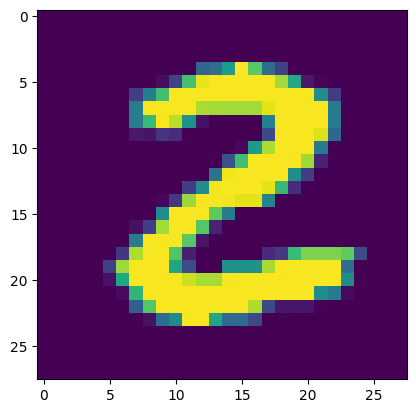

2


In [185]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [186]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [187]:
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [188]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [189]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [190]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [191]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [192]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8549 - loss: 0.5095
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9561 - loss: 0.1461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9681 - loss: 0.1060
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0832
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9835 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0395
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0329
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0281


Training data accuracy = 98.9%

**Accuracy on Test data:**

In [193]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1612
0.9684000015258789


Test data accuracy = 97.1%

In [194]:
print(X_test.shape)

(10000, 28, 28)


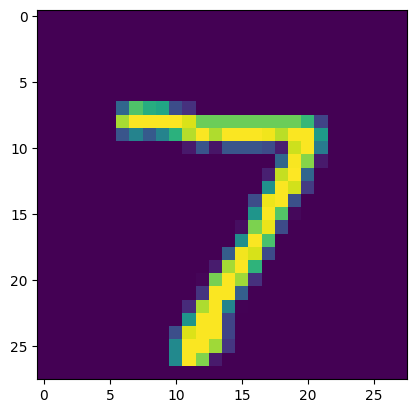

In [195]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [196]:
print(Y_test[0])

7


In [197]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [198]:
print(Y_pred.shape)

(10000, 10)


In [199]:
print(Y_pred[0])

[9.9503630e-08 2.9029170e-04 2.4312520e-02 9.7542387e-01 1.0600542e-05
 3.5136396e-05 2.5501899e-13 9.9999964e-01 4.7604577e-03 7.5390279e-01]


model.predict() gives the prediction probability of each class for that data point

In [200]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [201]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [202]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [203]:
print(conf_mat)

tf.Tensor(
[[ 958    0    5    2    2    1    3    1    3    5]
 [   0 1110    1    7    0    1    2    3    9    2]
 [   2    0  987   23    0    0    1    7   12    0]
 [   0    0    2  995    0    3    0    4    3    3]
 [   0    0    7    1  945    2    7    4    3   13]
 [   2    0    0   39    2  835    6    1    5    2]
 [   3    1    1    2    3    3  942    0    3    0]
 [   0    0    6    7    1    0    0  998    3   13]
 [   0    0    1   41    2    3    0    2  921    4]
 [   1    2    0   10    8    0    0    2    4  982]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

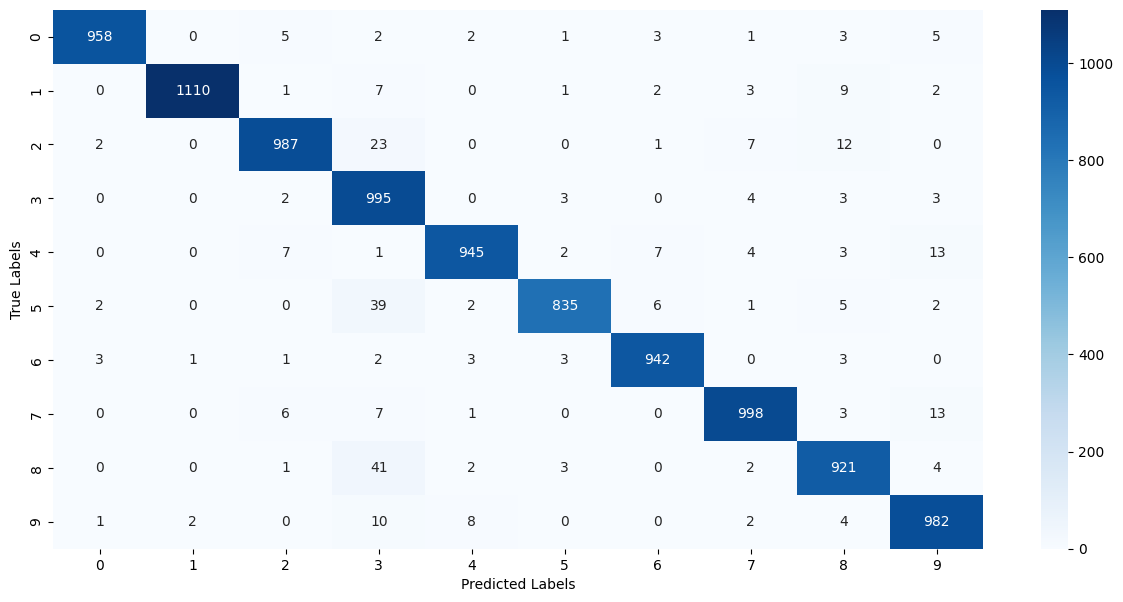

In [204]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [205]:
input_image_path = '/content/mnist image.png'

input_image = cv2.imread(input_image_path)

In [206]:
type(input_image)

numpy.ndarray

In [207]:
print(input_image)

[[[38 38 38]
  [36 36 36]
  [34 34 34]
  ...
  [26 26 26]
  [39 39 39]
  [20 20 20]]

 [[32 32 32]
  [30 30 30]
  [29 29 29]
  ...
  [27 27 27]
  [35 35 35]
  [23 23 23]]

 [[31 31 31]
  [30 30 30]
  [28 28 28]
  ...
  [29 29 29]
  [29 29 29]
  [28 28 28]]

 ...

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]

 [[31 31 31]
  [31 31 31]
  [30 30 30]
  ...
  [28 28 28]
  [28 28 28]
  [30 30 30]]]


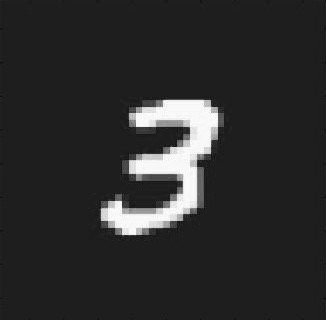

In [208]:
cv2_imshow(input_image)

In [209]:
input_image.shape

(320, 326, 3)

In [210]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [211]:
grayscale.shape

(320, 326)

In [212]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [213]:
input_image_resize.shape

(28, 28)

In [214]:
cv2_imshow(input_image_resize)

In [215]:
input_image_resize = input_image_resize/255

In [216]:
type(input_image_resize)

numpy.ndarray

In [217]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [218]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[1.8931553e-02 5.4689626e-05 4.3557757e-01 7.9955328e-01 3.2851845e-04
  1.8605321e-04 1.9972467e-07 4.0010846e-04 9.5455378e-01 8.7730747e-01]]


In [219]:
input_pred_label = np.argmax(input_prediction)

In [220]:
print(input_pred_label)

8


**Predictive System**

Path of the image to be predicted: /content/mnist 7.png


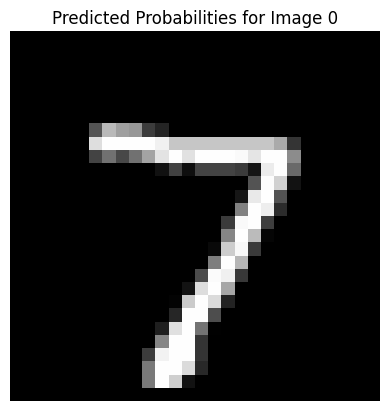

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
The Handwritten Digit is recognised as  7


In [221]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [222]:
!pip install gradio

In [228]:
import gradio as gr
import numpy as np
import cv2
from PIL import Image

def predict(img):
    arr = np.array(img)

    if arr.max() <= 1.0:
        arr = (arr * 255).astype("uint8")
    else:
        arr = arr.astype("uint8")

    img_gray = Image.fromarray(arr).convert("L")
    img_gray = img_gray.resize((28, 28))

    arr_gray = np.array(img_gray).astype("float32") / 255.0
    arr_gray = 1 - arr_gray  # Invert to match training data (white on black)
    arr_gray = arr_gray.reshape(1, 28, 28)

    prediction = model.predict(arr_gray)
    predicted_label = np.argmax(prediction)

    return f"Predicted digit: {predicted_label}"

# Gradio Interface
gr.Interface(
    fn=predict,
    inputs=gr.Sketchpad(canvas_size=(280, 280), type="numpy"),
    outputs="label",
    live=True
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://42bcad69aefb7ce61e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
